Mean Squared Error: 180.46247742767224


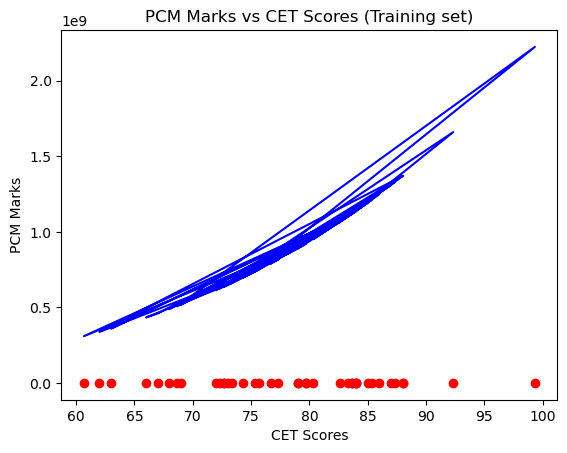

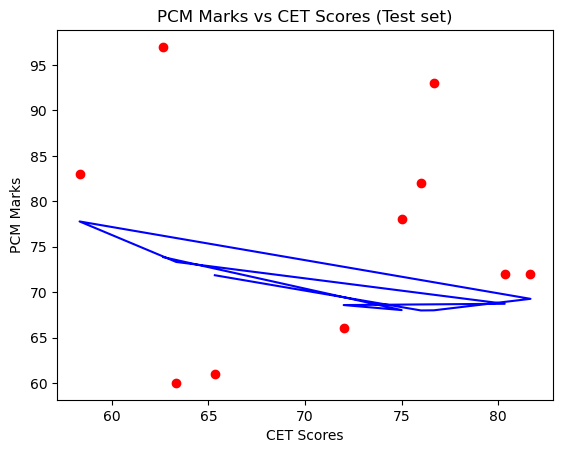

In [4]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importing the dataset
dataset = pd.read_csv('large_student_dataset.csv')
subset = dataset.head(50)

# Selecting features (X) and target (y)
X = subset.iloc[:, 5:6].values  
y = subset.iloc[:, -1].values  

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying Polynomial Features transformation (Polynomial Regression)
poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

# Normalizing the data using StandardScaler
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Ridge Regression (with regularization)
ridgeReg = Ridge(alpha=0.05)  
ridgeReg.fit(X_poly_train, y_train)

# Making predictions on the test set
y_pred = ridgeReg.predict(X_poly_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizing the Polynomial Regression results (on the training set)
plt.scatter(X_train, y_train, color='red') 
plt.plot(X_train, ridgeReg.predict(poly_reg.transform(X_train)), color='blue') 
plt.title('PCM Marks vs CET Scores (Training set)')
plt.xlabel('CET Scores')
plt.ylabel('PCM Marks')
plt.show()

# Visualizing the Polynomial Regression results (on the test set)
plt.scatter(X_test, y_test, color='red')  
plt.plot(X_test, y_pred, color='blue') 
plt.title('PCM Marks vs CET Scores (Test set)')
plt.xlabel('CET Scores')
plt.ylabel('PCM Marks')
plt.show()
